In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
cp = pd.read_csv("CarPrice_Assignment.csv")
cp

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Taking a look at the descriptive and categorical variables

In [4]:
cp.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

###  Cleaning the cell CarCompany and dropping the original column

In [5]:
cp["CarCompany"] = cp.CarName.apply(lambda x: x.split()[0].split("-")[0].upper()) 

In [6]:
cp.drop("CarName", axis=1, inplace=True)

### Encoding the column "fuel type" with 1 for diesel and 0 for gas

In [7]:
cp["fueltype"] = cp["fueltype"].apply(lambda x: 1 if x=="diesel" else 0)

### Encoding the column "enginelocation" with 1 for rear and 0 for front

In [8]:
cp["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [9]:

cp["enginelocation"] = cp["enginelocation"].apply(lambda x: 1 if x=="rear" else 0)

### Encoding the column "aspiration" with 1 for turbo and 0 for std


In [10]:
cp["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [11]:
cp["aspiration"] = cp["aspiration"].apply(lambda x: 1 if x=="turbo" else 0)

### Encoding the column "doornumber" with 1 for two and 0 for std


In [12]:
cp["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [13]:
cp["doornumber"] = cp["doornumber"].apply(lambda x: 1 if x=="two" else 0)

### Creating dummy variables for categorical variables

#### Dummy variablize "CarCompany" ,"carbody","enginetype","fuelsystem","drivewheel"
#### Dropping original columns with categorical variables after creating dummy variables

In [14]:
def generateDummyColumnsForCategoricalColumn(columnNames,  df):
    for columnName in columnNames:
        dummyFrameForColumn = pd.get_dummies(df[columnName], drop_first = True)
        result = {}
        previous_cols_name=list(dummyFrameForColumn.columns)
        updated_cols_name=list(map(lambda value:columnName+"_"+value, previous_cols_name))
        result = {previous_cols_name[i]: updated_cols_name[i] for i in range(len(previous_cols_name))} 
        dummyFrameForColumn.rename(columns=result,  inplace=True)
        df = pd.concat([df, dummyFrameForColumn], axis = 1)
    df
    return df



In [15]:
catergoricalVariables = ["CarCompany" ,"carbody","enginetype","fuelsystem","drivewheel"]
cp = generateDummyColumnsForCategoricalColumn(catergoricalVariables,cp)
cp.drop(["CarCompany","carbody","enginetype","fuelsystem","drivewheel"], axis=1,inplace=True)
cp

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,drivewheel_fwd,drivewheel_rwd
0,1,3,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,1
1,2,3,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,1
2,3,1,0,0,1,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,4,2,0,0,0,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,1,0,0,1,0
4,5,2,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,0,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,1,0,0,0,1
201,202,-1,0,1,0,0,109.1,188.8,68.8,55.5,...,0,0,0,0,0,1,0,0,0,1
202,203,-1,0,0,0,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,1,0,0,0,1
203,204,-1,1,1,0,0,109.1,188.8,68.9,55.5,...,0,0,0,1,0,0,0,0,0,1


In [16]:
cp.shape


(205, 66)

## Encoding the column cylindernumber 

### https://www.autoblog.com/2015/12/02/what-do-different-cylinder-numbers-mean-in-regards-to-engine-per/
### Cylinder numbers are taken as ordinal categorical variable hence the encoding is done with integers


In [17]:

cp.cylindernumber.unique()
cylinderNumbers = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
cp["cylindernumber"] = cp["cylindernumber"].apply(lambda x: cylinderNumbers.get(x))

In [18]:
cp.groupby("cylindernumber").mean()["price"]

cylindernumber
2     13020.000000
3      5151.000000
4     10285.754717
5     21630.469727
6     23671.833333
8     37400.100000
12    36000.000000
Name: price, dtype: float64

In [19]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
car_ID                   205 non-null int64
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
cylindernumber           205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
p

## Data cleaning and encoding complete and no missing values.
## Dummy variable creation is also done for categorical variables

## Starting the modelling
## Assumed Thresholds:
### p-value : maximum of 0.05
### VIF value : maximum of 5
### A few of Car brands, will be taken as predictors towards the end of modelling so as to explain how a brand can affect pricing strategy. 

### Creating training and test subsets for the input data.

In [20]:
from sklearn.model_selection import train_test_split


cp_train, cp_test = train_test_split(cp, train_size = 0.7, test_size = 0.3, random_state = 100)

### Using MinMax scaler for scaling the dataset. 
### Will will be modelling as per the min-max scaled values of the dataset

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = list(cp_train.columns)
cp_train[columns] = scaler.fit_transform(cp_train[columns])

In [22]:
y_train = cp_train.pop("price")

X_train = cp_train 

## Since the training dataset has huge number of variables, it is manually tedious to go through all the variables. Hence considering Recursive Feature Elimination for selecting few variables and choosing manually the necessary predictors

In [23]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)


rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [25]:
result_rankings = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
result_rankings.rename(columns={0:"predictor", 1:"relevance", 2:"rank"} , inplace=True)
relevant_result_rankings = result_rankings[result_rankings["relevance"]==True]
result_rankings

,predictor,relevance,rank
0,car_ID,False,4
1,symboling,False,40
2,fueltype,True,1
3,aspiration,False,18
4,doornumber,False,39
...,...,...,...
60,fuelsystem_mpfi,False,36
61,fuelsystem_spdi,False,41
62,fuelsystem_spfi,False,45
63,drivewheel_fwd,False,38


In [26]:
max_relevant_rank = 10
relevant_result_rankings = result_rankings[result_rankings["rank"] <=max_relevant_rank].sort_values(by="rank")
relevant_predictors = list(relevant_result_rankings["predictor"])
non_relevant_predictors =  list(result_rankings[result_rankings["rank"] >max_relevant_rank]["predictor"])
print("Number of selected top predictors:",len(relevant_predictors))
print(relevant_predictors)

Number of selected top predictors: 29
['CarCompany_MITSUBISHI', 'enginetype_dohcv', 'CarCompany_VOLKSWAGEN', 'CarCompany_TOYOTA', 'CarCompany_SUBARU', 'CarCompany_RENAULT', 'CarCompany_PEUGEOT', 'enginetype_rotor', 'CarCompany_MAXDA', 'CarCompany_BMW', 'fuelsystem_idi', 'stroke', 'boreratio', 'enginesize', 'cylindernumber', 'compressionratio', 'curbweight', 'carwidth', 'enginelocation', 'fueltype', 'CarCompany_TOYOUTA', 'CarCompany_PLYMOUTH', 'car_ID', 'CarCompany_NISSAN', 'CarCompany_VOLVO', 'CarCompany_VW', 'CarCompany_MAZDA', 'CarCompany_SAAB', 'CarCompany_HONDA']


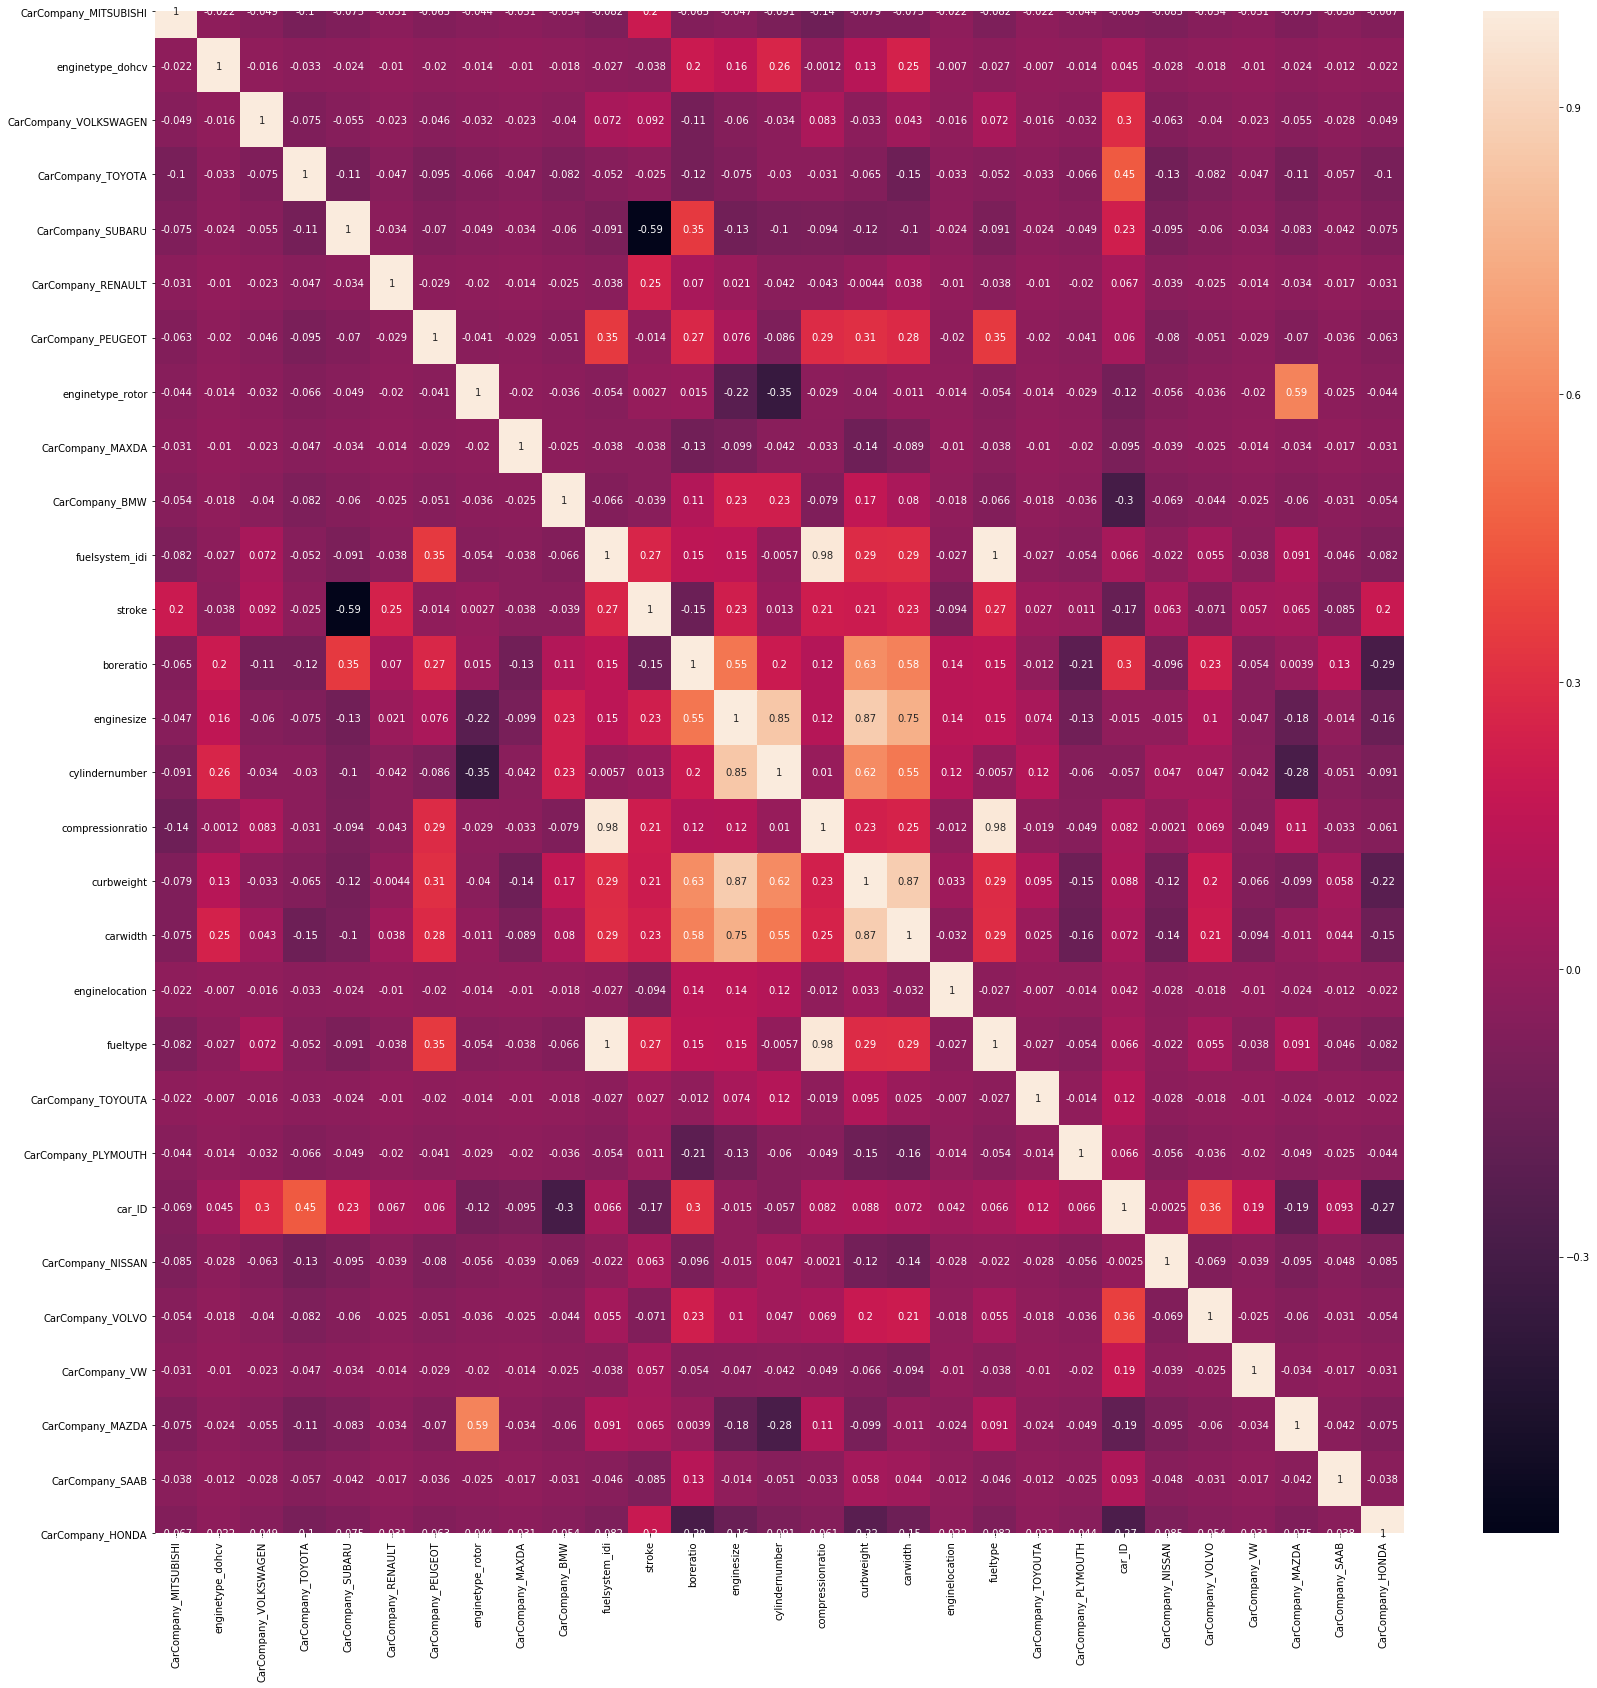

In [27]:
a4_dims = (28, 28)
fig, ax = plt.subplots(figsize=a4_dims)

sns.heatmap((X_train[relevant_predictors]).corr(), annot=True)

In [28]:
import statsmodels.api as sm


In [29]:

# Add a constant
X_train_relevant = X_train[relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     80.42
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.13e-62
Time:                        18:32:37   Log-Likelihood:                 233.79
No. Observations:                 143   AIC:                            -409.6
Df Residuals:                     114   BIC:                            -323.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [30]:
dropped_predictors = ["fueltype"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     80.42
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.13e-62
Time:                        18:32:37   Log-Likelihood:                 233.79
No. Observations:                 143   AIC:                            -409.6
Df Residuals:                     114   BIC:                            -323.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [31]:
#### Since car_ID has high VIF, dropping the predictor

In [32]:

dropped_predictors = ["fueltype","car_ID"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     76.38
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.26e-61
Time:                        18:32:37   Log-Likelihood:                 227.22
No. Observations:                 143   AIC:                            -398.4
Df Residuals:                     115   BIC:                            -315.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

#### CarCompany_VOLVO - as the p_value is very high, the predictor is insignificant and dropping the same

In [33]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     79.99
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.73e-62
Time:                        18:32:37   Log-Likelihood:                 227.21
No. Observations:                 143   AIC:                            -400.4
Df Residuals:                     116   BIC:                            -320.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

#### Proceeding iteratively with the previous model with removing variables one by one with the predictors of p-value>0.05 - removed "CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH" one by one

In [34]:


dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO","CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     94.85
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.07e-65
Time:                        18:32:37   Log-Likelihood:                 225.14
No. Observations:                 143   AIC:                            -404.3
Df Residuals:                     120   BIC:                            -336.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

#### Proceeding iteratively with the previous model with removing CarCompany_HONDA as  p-value>0.05

In [35]:


dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     99.07
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.72e-66
Time:                        18:32:37   Log-Likelihood:                 224.38
No. Observations:                 143   AIC:                            -404.8
Df Residuals:                     121   BIC:                            -339.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [36]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.52e-67
Time:                        18:32:37   Log-Likelihood:                 219.73
No. Observations:                 143   AIC:                            -401.5
Df Residuals:                     124   BIC:                            -345.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [37]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.06e-67
Time:                        18:32:37   Log-Likelihood:                 217.96
No. Observations:                 143   AIC:                            -399.9
Df Residuals:                     125   BIC:                            -346.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

### Even though compression ratio is significant in the previous model, dropping the same owing to the high VIF

In [38]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio" ]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     117.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.55e-67
Time:                        18:32:37   Log-Likelihood:                 214.75
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     126   BIC:                            -345.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

### Dropping the variable CarCompany_MAZDA because of high p value

In [39]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA" ]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.05e-68
Time:                        18:32:37   Log-Likelihood:                 213.26
No. Observations:                 143   AIC:                            -394.5
Df Residuals:                     127   BIC:                            -347.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

### curbweight - next removed variable due to high VIF

In [40]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.35e-66
Time:                        18:32:37   Log-Likelihood:                 205.48
No. Observations:                 143   AIC:                            -381.0
Df Residuals:                     128   BIC:                            -336.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

### carwidth - next removed variable due to high VIF

In [41]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight","carwidth"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.24
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.33e-51
Time:                        18:32:37   Log-Likelihood:                 165.43
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     129   BIC:                            -261.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

### CarCompany_PEUGEOT - Choosing as next variable(bwcause of high p value) to remove rather than enginesize(has high VIF) as the latter is of more significance in the deduction of price

In [42]:

dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight","carwidth","CarCompany_PEUGEOT"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     73.92
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.24e-52
Time:                        18:32:37   Log-Likelihood:                 164.03
No. Observations:                 143   AIC:                            -302.1
Df Residuals:                     130   BIC:                            -263.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

### CarCompany_SUBARU - Choosing as next variable(bwcause of high p value) to remove rather than enginesize(has high VIF) as the latter is of more significance in the deduction of price


In [43]:
dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight","carwidth","CarCompany_PEUGEOT","CarCompany_SUBARU"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     78.89
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.01e-52
Time:                        18:32:37   Log-Likelihood:                 162.19
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     131   BIC:                            -264.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [44]:
dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight","carwidth","CarCompany_PEUGEOT","CarCompany_SUBARU"
                     ]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     78.89
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.01e-52
Time:                        18:32:37   Log-Likelihood:                 162.19
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     131   BIC:                            -264.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

### cylindernumber has high VIF which indicates that it's variance is explained by some other variables in the dataset. Dropping the same

In [45]:
dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight","carwidth","CarCompany_PEUGEOT","CarCompany_SUBARU"
                     ,"cylindernumber"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     79.02
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.51e-51
Time:                        18:32:37   Log-Likelihood:                 155.94
No. Observations:                 143   AIC:                            -289.9
Df Residuals:                     132   BIC:                            -257.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

### boreratio has high VIF as well has high p values, which indicates that its is insignificant for the analysis and also its variance is explained by some other variables in the dataset. Dropping the same

In [46]:
dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight","carwidth","CarCompany_PEUGEOT","CarCompany_SUBARU"
                     ,"cylindernumber","boreratio"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     88.46
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.80e-52
Time:                        18:32:37   Log-Likelihood:                 155.94
No. Observations:                 143   AIC:                            -291.9
Df Residuals:                     133   BIC:                            -262.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

### stroke has high p value. Hence dropping the same

In [47]:
dropped_predictors = ["fueltype","car_ID","CarCompany_VOLVO"
                      ,"CarCompany_SAAB","CarCompany_VW","CarCompany_TOYOUTA","CarCompany_PLYMOUTH"
                     ,"CarCompany_HONDA","CarCompany_RENAULT","CarCompany_MAXDA","CarCompany_VOLKSWAGEN","CarCompany_NISSAN"
                     ,"compressionratio","CarCompany_MAZDA"
                     ,"curbweight","carwidth","CarCompany_PEUGEOT","CarCompany_SUBARU"
                     ,"cylindernumber","boreratio","stroke"]
updated_relevant_predictors = list(set(relevant_predictors)-set(dropped_predictors))

# Add a constant
X_train_relevant = X_train[updated_relevant_predictors]
X_train_lm = sm.add_constant(X_train_relevant)
print("Relevant columns considered for regression: ")
print(list(X_train_lm.columns))
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_relevant.columns
vif['VIF'] = [variance_inflation_factor(X_train_relevant.values, i) for i in range(X_train_relevant.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

Relevant columns considered for regression: 
['const', 'CarCompany_TOYOTA', 'enginelocation', 'CarCompany_MITSUBISHI', 'enginesize', 'fuelsystem_idi', 'CarCompany_BMW', 'enginetype_dohcv', 'enginetype_rotor']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     99.69
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.32e-52
Time:                        18:32:37   Log-Likelihood:                 155.58
No. Observations:                 143   AIC:                            -293.2
Df Residuals:                     134   BIC:                            -266.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
 

### All the predictors have the VIF <2 anf p-value <0.05. Hence all the predictors are taken as relevant. Proceeding with evaluation of the built model. 
### Acheived R-squared of 0.856 on training dataset, adjusted R-squared 0.848
### prob(F-statistic) value is far less than 0.00001 and hence the model is expected to explain the data
### Selected predictors -            enginesize,fuelsystem_idi,CarCompany_BMW,CarCompany_TOYOTA,CarCompany_MITSUBISHI,enginetype_dohcv,enginelocation,enginetype_rotor  1.00

In [48]:
y_train_pred = lr.predict(X_train_lm)

Text(0.5, 0.98, 'Actual and Predicted on training set')

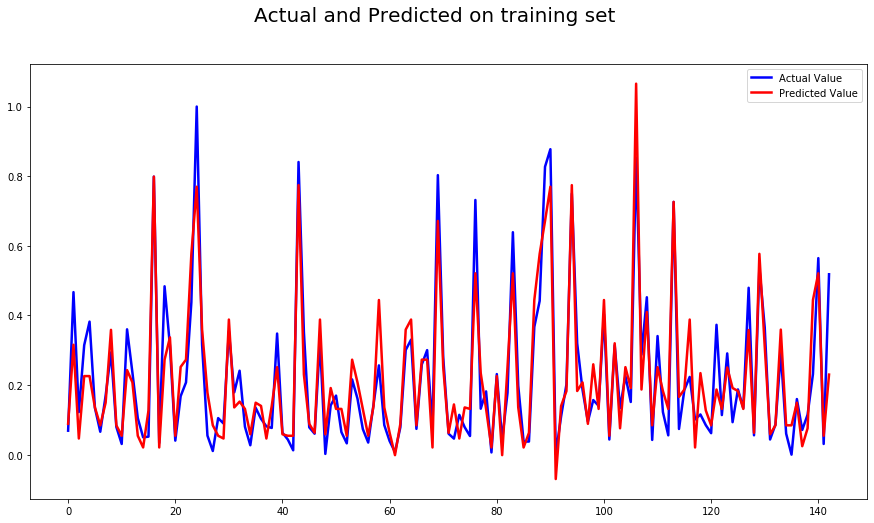

In [49]:
#Actual vs Predicted
c = [i for i in range(0,len(y_train))]
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-", label="Actual Value")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-", label="Predicted Value")
plt.legend(loc="upper right")
fig.suptitle('Actual and Predicted on training set', fontsize=20)              # Plot heading 


Text(0.5, 0.98, 'Corelation matrix on the selected variables')

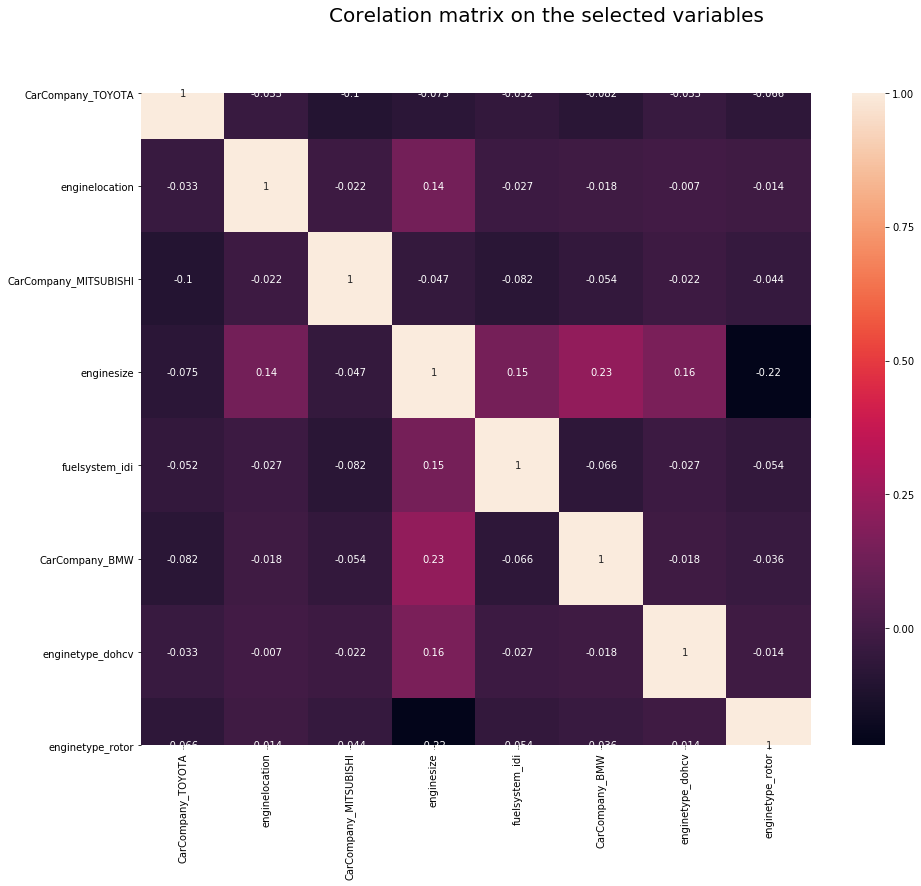

In [50]:
a4_dims = (15, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(X_train_relevant.corr(), annot=True)
fig.suptitle('Corelation matrix on the selected variables', fontsize=20)              # Plot heading 


### From the above figure, it is fairly assumable that the selected predictors are independent

Text(0.5, 0, 'Errors')

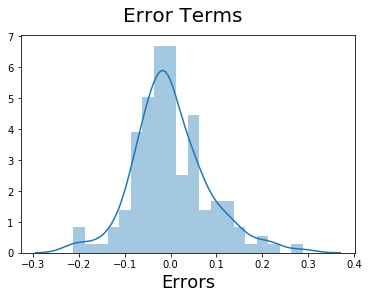

In [51]:
y_train_price = lr.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Model evaluation on test dataset

### Scaling the test dataset with the same scaler - MinMax for evaluation

In [52]:
columns = list(cp_test.columns)
cp_test[columns] = scaler.fit_transform(cp_test[columns])
y_test = cp_test.pop('price')
X_test = cp_test

In [53]:
# Adding constant variable to test dataframe
X_test = X_test[updated_relevant_predictors]
X_test_addedconst = sm.add_constant(X_test)
X_test_addedconst

,const,CarCompany_TOYOTA,enginelocation,CarCompany_MITSUBISHI,enginesize,fuelsystem_idi,CarCompany_BMW,enginetype_dohcv,enginetype_rotor
160,1.0,1.0,0.0,0.0,0.082969,0.0,0.0,0.0,0.0
186,1.0,0.0,0.0,0.0,0.131004,0.0,0.0,0.0,0.0
59,1.0,0.0,0.0,0.0,0.187773,0.0,0.0,0.0,0.0
165,1.0,1.0,0.0,0.0,0.082969,0.0,0.0,0.0,0.0
140,1.0,0.0,0.0,0.0,0.126638,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28,1.0,0.0,0.0,0.0,0.187773,0.0,0.0,0.0,0.0
29,1.0,0.0,0.0,0.0,0.336245,0.0,0.0,0.0,0.0
182,1.0,0.0,0.0,0.0,0.078603,1.0,0.0,0.0,0.0
40,1.0,0.0,0.0,0.0,0.135371,0.0,0.0,0.0,0.0


In [54]:
y_test_pred = lr.predict(X_test_addedconst)

Text(0, 0.5, 'y_pred')

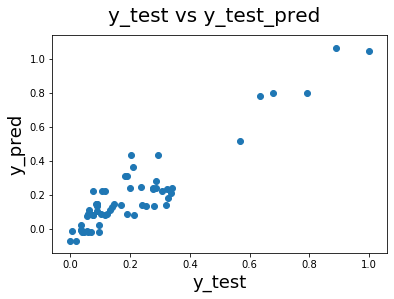

In [55]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)      

### Evaluating R-squared value on test dataset

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

In [57]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008169876440742683
r_square_value : 0.8133282226095808


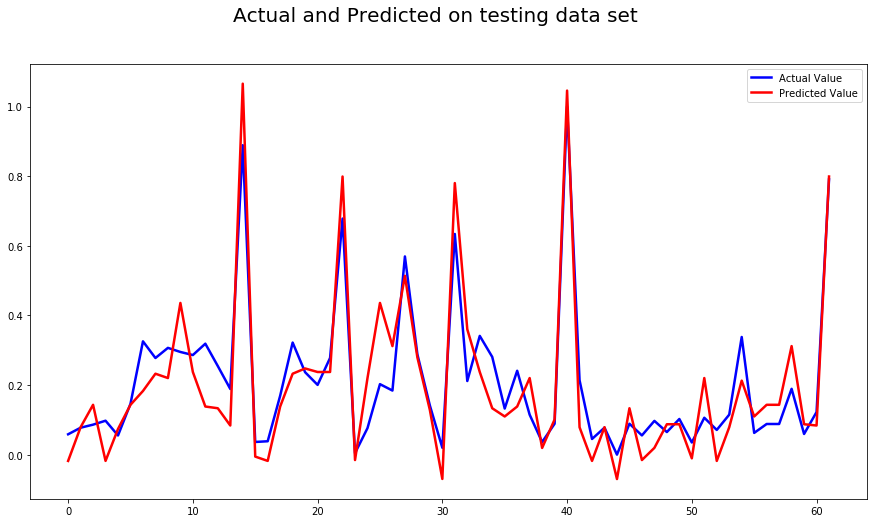

In [58]:
#Actual vs Predicted
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
c = [i for i in range(0,len(y_test))]
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-", label="Actual Value")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-", label="Predicted Value")
fig.suptitle('Actual and Predicted on testing data set', fontsize=20) 
plt.legend(loc="upper right")


<pre>
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0701      0.015     -4.799      0.000      -0.099      -0.041
CarCompany_TOYOTA        -0.0422      0.021     -1.996      0.048      -0.084      -0.000
CarCompany_BMW            0.2055      0.037      5.615      0.000       0.133       0.278
enginesize                1.1358      0.050     22.616      0.000       1.036       1.235
enginelocation            0.2987      0.086      3.484      0.001       0.129       0.468
fuelsystem_idi            0.0681      0.025      2.712      0.008       0.018       0.118
CarCompany_MITSUBISHI    -0.0642      0.029     -2.182      0.031      -0.122      -0.006
enginetype_dohcv          0.1876      0.086      2.180      0.031       0.017       0.358
enginetype_rotor          0.2391      0.044      5.428      0.000       0.152       0.326
<pre/>

<pre>
On min-max scaled data, model is follows
price = -0.0701 +
         1.1358*enginesize + 
         0.2987*enginelocation + 
         0.0681*fuelsystem_idi + 
         0.1876*enginetype_dohcv +
         0.2391*enginetype_rotor +
        -0.0422*CarCompany_TOYOTA + 
         0.2055*CarCompany_BMW + 
        -0.0642*CarCompany_MITSUBISHI 
        
Interpretation : 
Engine size has highest positive impact on price
Engine location, affects positively 
fuelsystem being idi, affects positively
enginetype being dohcv or rotor, affects positively
HigherBrand value affects the price positively for as much 20%
LowerBrand value affects the price slightly negatively 
</pre